In [71]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

################################################################################
#
#    PLOTTING OPTIONS
#
################################################################################


# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

In [33]:

from pycbc.waveform import get_td_waveform
from pycbc.waveform import get_fd_waveform

In [11]:
from pycbc.waveform import ringdown

In [2]:
hp, hc = get_fd_waveform(approximant='IMRPhenomD',
                                 mass1=1e-6,
                                 mass2=1e-6,
                                 distance = 1,
                                 delta_f=1e5,
                                 f_lower=40)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


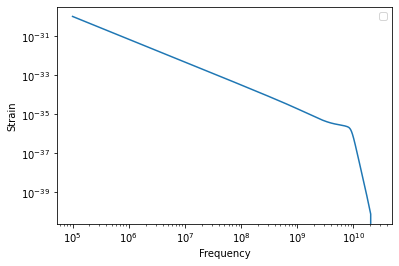

In [3]:
pp.loglog(hp.sample_frequencies, np.abs(hp))

pp.ylabel('Strain')
pp.xlabel('Frequency')
pp.legend()
pp.show()

# Ringdown

In [76]:
a220 = ringdown.Kerr_factor(1e-6,1.939e-9/400/100000)

In [77]:
a220

9.87192556425931e-10

In [78]:
a220 *=  0.864*0.25

In [79]:
a220

2.132335921880011e-10

In [80]:
from pycbc.waveform.generator import FDomainMassSpinRingdownGenerator
generator = FDomainMassSpinRingdownGenerator(variable_args=['final_mass',
                    'final_spin','amp220','phi220'], lmns=['221'],
                    delta_f=1e8, f_lower=30., f_final=1e11)

In [84]:
wf = generator.generate(final_mass=1e-6, final_spin=0,
                           amp220=a220,  phi220=0.,inclination=0)

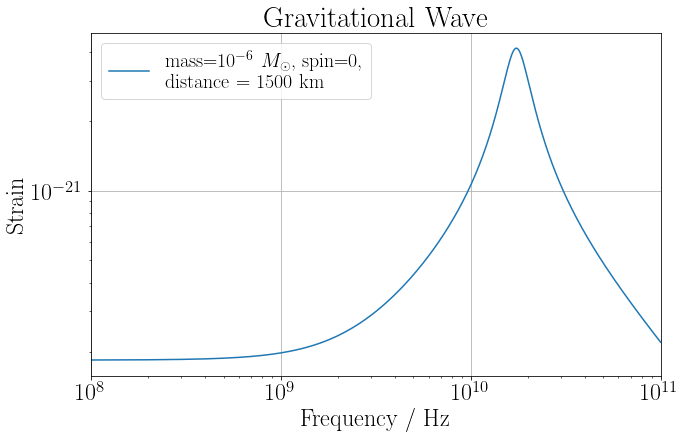

In [94]:
plt.loglog(wf[0].sample_frequencies,np.abs(wf[0]),label='mass=$10^{-6}~M_\odot$,~spin=0, \ndistance = 1500 km')
plt.xlabel('Frequency / Hz')
plt.ylabel('Strain')
plt.xlim(1e8,1e11)
plt.legend()
plt.title('Gravitational Wave')
plt.savefig('ringdown.pdf',bbox_inches='tight')